In this Example we will deep dive further Machine Learning and Deep learning. We will build what is called a **Computer Vision** task. Through this we can classifiy and predict images  that we feed as input.



In [1]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
print(tf.__version__)

2.15.0


For this notebook we will use [Fasshion MNIST](https://github.com/zalandoresearch/fashion-mnist) dataset. This Dataset contains over **75 Thousand** examples , of which **60 Thousand** is Training dataset and rest **15 Thousand** is test set. The Images are all of `28x28` dimensions with 10 classes. Lets get the data.

In [2]:
fashionMnist = tf.keras.datasets.fashion_mnist
(train_images,train_labels), (test_images, test_labels) = fashionMnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


LABEL:5

IMAGE PIXEL ARRAY:
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   3   1   0   0   1   1   0   0   0   0  58   0  39   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   3   0   0   0   0   0   0   0  64 109 146 192 193   7   0]
 [  0   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0  94  38  99 209 183 229 192 142  48   0   0   0]
 [  0   0   0   0   0   0   0   0   0   1   0   0   0   0  41  45 158 146 164 114  51   1  53 105  42  36   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  10  68  44  30  59 172 146   0  22   0  13 103 111 103   0   0]
 [  0   0   0   0   0   0   0   0   0   3   1   0  22  61  88 152 255  71   0   0   0   0  35  85 112 201  44   0]
 [  0   0   0   0   0   0   0   0   0   1   0   0  

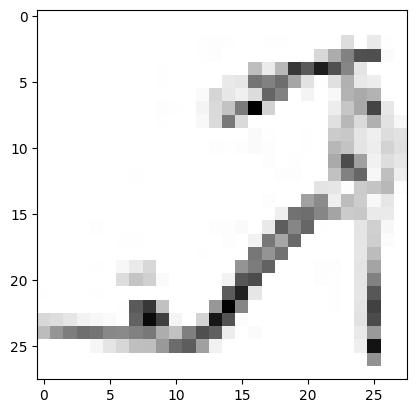

In [6]:
import matplotlib.pyplot as plt


index = 8

#Set number of charecter per row when printing
np.set_printoptions(linewidth=320)

#print label
print(f'LABEL:{train_labels[index]}')
print(f'\nIMAGE PIXEL ARRAY:\n {train_images[index]}')

plt.imshow(train_images[index], cmap='Greys')

As we can see these images are uniform , that is there values vary differntly for each image. So in order to have a uniform dataset, we will **normalize** the entire dataset from the value `0 to 255`.

In [7]:
train_images = train_images/255.0
test_images = test_images/255.0

Without further due lets build our neural network.

In [3]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10,activation=tf.nn.softmax)
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Now for this example , there is a lot changes from previous examples.
1. Since our source data is an image of size `28x28` . But our neural network does not know how to read image data. So we will convert a `3x3x3` [This is due to the fact that images are compirsed of Layers of red blue and green]style image into `1x784`.This can be achieved using **Flatten** function from keras.
This will output a matrix of size 1x784 as shown above.

2. Once we have done this, we will do our usual **Dense** layer to compress the values from `1x784` to `1x128`. This can done using a **Activation Function**. An Activation function takes the output from neuron and regualirezs it from a value of `0 to 1`. Here we are using two activation functions : **relu** and **softmax** . These two are the most commonly use activation functions.

3. The Output of the last layer is `1x10` and contains value from 1-9. This will be used to predict.

In [9]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Here we are using a
1. [Adam optmizer](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam)
2. [Sparse categorical cross entropy](https://www.tensorflow.org/api_docs/python/tf/keras/losses/SparseCategoricalCrossentropy)

In [10]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4982 - accuracy: 0.8258
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3788 - accuracy: 0.8639
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3367 - accuracy: 0.8767
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3137 - accuracy: 0.8846
Epoch 5/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2956 - accuracy: 0.8906


We will evaluate our image using the test labels.

In [11]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.3528 - accuracy: 0.8730


[0.3527677059173584, 0.8730000257492065]

We can also change the epochs so that the epochs change until the set efficiency is met. This is done using Callbacks().

In [15]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    '''
    Halts the training after reaching 60 percent accuracy

    Args:
      epoch (integer) - index of epoch (required but unused in the function definition below)
      logs (dict) - metric results from the training epoch
    '''

    # Check accuracy
    if(logs.get('loss') < 0.2):

      # Stop if threshold is met
      print("\nLoss is lower than 0.4 so cancelling training!")
      self.model.stop_training = True

# Instantiate class
callbacks = myCallback()

In [16]:
# Train the model with a callback
model.fit(train_images, train_labels, epochs=10, callbacks=[callbacks])

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2683 - accuracy: 0.8999
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2572 - accuracy: 0.9047
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2482 - accuracy: 0.9065
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2396 - accuracy: 0.9105
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2330 - accuracy: 0.9130
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2255 - accuracy: 0.9148
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2181 - accuracy: 0.9186
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2120 - accuracy: 0.9208
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2053 - accuracy: 0.9235
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.201

In [17]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.3442 - accuracy: 0.8904


[0.3441849946975708, 0.8903999924659729]